In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.rename(columns = {"race/ethnicity" : "ethnicity"}, inplace = True)

In [4]:
df.isnull().sum()

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

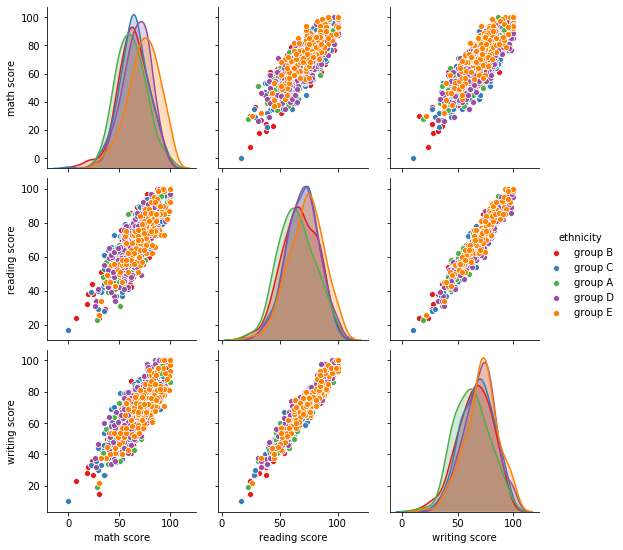

In [5]:
sns.pairplot(data = df, hue = "ethnicity", palette = "Set1")
plt.show()

# K MEANS CLUSTERING

In [6]:
from sklearn.cluster import KMeans

In [7]:
scores = df.loc[:,["math score","reading score","writing score"]]

In [8]:
scores.rename(index = int, columns = {"math score":"mthscore","reading score":"readscr","writing score":"writingscr"},inplace=True)

In [9]:
wcss = [] # WITH IN CLUSTER SUM OF SQUARES#

In [10]:
for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)

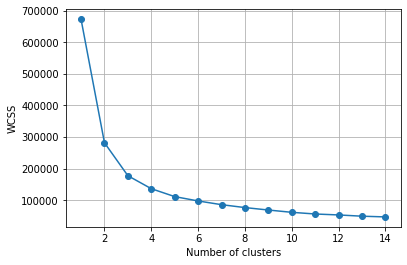

In [11]:
plt.plot(range(1,15), wcss, "-o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [12]:
kmeans1 = KMeans(n_clusters = 5)
clusters = kmeans1.fit_predict(scores)
scores["examscores"] = clusters

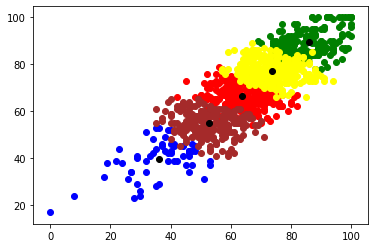

In [13]:
plt.scatter(scores.mthscore[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.mthscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.mthscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mthscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="yellow")
plt.scatter(scores.mthscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],color="black")
plt.show()

# HIERARCHICAL CLUSTERING

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram

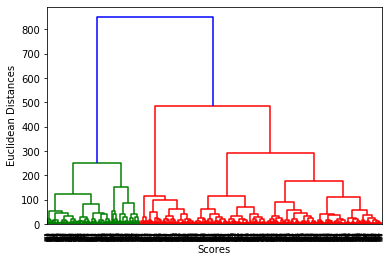

In [16]:
merg = linkage(scores, method = "ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Scores")
plt.ylabel("Euclidean Distances")
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity="euclidean", linkage="ward")
prediction = cluster.fit_predict(scores)

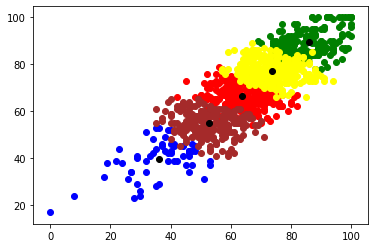

In [19]:
plt.scatter(scores.mthscore[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red")
plt.scatter(scores.mthscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green")
plt.scatter(scores.mthscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue")
plt.scatter(scores.mthscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="yellow")
plt.scatter(scores.mthscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="brown")
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],color="black")
plt.show()